In [12]:
''' Import libraries '''
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import numpy as np

In [4]:
''' Load data '''
file_path = "Heart_Disease_Prediction.csv" # Make sure to change this
df_all = pd.read_csv(file_path).drop(["index"], axis=1)

features_target = df_all['Heart Disease']

int_convert = []
for x in range(len(features_target)):
    if(features_target[x] == "Presence"):
        int_convert.append(1)
    else:
        int_convert.append(0)

#define features and classification
features_target = pd.DataFrame(data = int_convert, columns= ["Heart Disease"])
features_target = features_target['Heart Disease']
features = df_all.drop(['BP', 'Cholesterol', 'FBS over 120', 'EKG results','Heart Disease'], axis = 1)

#train test split
x_train, x_test, y_train, y_test = train_test_split(features, features_target)



# Model

In [5]:
model = QuadraticDiscriminantAnalysis()

# Hyperparamater Tuning

In [6]:
params = [{'reg_param': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.9]}]
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
qda_grid_search = GridSearchCV(model, params, cv = cv)
result = qda_grid_search.fit(x_train, y_train)
result.best_score_

0.8584920634920635

# Predict Values

In [7]:
y_pred=qda_grid_search.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0])

# Cross Validation Score

In [8]:
scores = cross_val_score(model, features, features_target, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores)) 

0.8370370370370369


# ROC Curve

0.7637209302325582


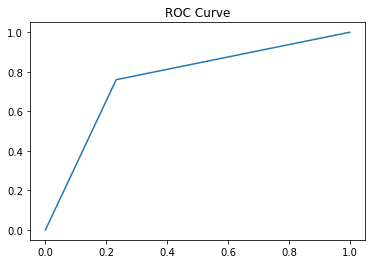

In [9]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate)
plt.title("ROC Curve")
area_under_curve = roc_auc_score(y_test, y_pred)
print(area_under_curve)

# Confusion Matrix

In [10]:
qda_conf_mat = confusion_matrix(y_test, y_pred)
qda_conf_mat

array([[33, 10],
       [ 6, 19]])

# F-Score

In [16]:
target_names = ['class Presence', 'class Abscence']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.85      0.77      0.80        43
     class 1       0.66      0.76      0.70        25

    accuracy                           0.76        68
   macro avg       0.75      0.76      0.75        68
weighted avg       0.78      0.76      0.77        68

